# AIN313 Assignment 1
## Tree of Decision — Complete Implementation Guide


**Due:** October 20, 2025 (23:59:59)  
**Format:** Jupyter Notebook (`.ipynb`) with integrated code and report  

---

### Implementation Recommendations
- Set random seed (42) at the beginning for reproducibility  
- Use markdown cells to separate sections and explain your approach  
- Comment your code thoroughly  
- Test each component before integrating  
- Save intermediate results to avoid re-running expensive computations  
- Use pandas for data handling, numpy for computations  
- Visualize early and often to understand your data and results  
- Keep track of computation time for different approaches

---

### Important Reminders
- NO ready-made decision tree or pruning implementations allowed  
- You CAN use `sklearn` for: `KFold`, `train_test_split`, `metrics`  
- You CAN use `numpy` and `pandas` for data manipulation  
- Document all hyperparameter choices and justify them


## 1. Header & Imports


- Assignment title and student information
- Import statements (numpy, pandas, sklearn for metrics only)
- Random seed setting for reproducibility
- Suppress warnings

 AIN313 ASSIGNMENT 1

 Name: Ebrar Pınar Kuz

 Student ID: 2220765017

In [125]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import time
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from sklearn.model_selection import train_test_split






In [126]:
df = pd.read_csv("C:/Users/SAMET/Downloads/archive (3)/diabetes_dataset.csv")



sample_df = df.sample(n=20000, random_state=42)
print(sample_df.head())

warnings.filterwarnings("ignore")


       age  gender ethnicity education_level  income_level employment_status  \
75721   55  Female     White        Graduate  Lower-Middle        Unemployed   
80184   82  Female     White        Graduate        Middle          Employed   
19864   70    Male     Black    Postgraduate           Low           Retired   
76699   18    Male     White        Graduate  Upper-Middle           Student   
92991   55    Male     White        Graduate           Low          Employed   

      smoking_status  alcohol_consumption_per_week  \
75721        Current                             1   
80184          Never                             0   
19864          Never                             1   
76699        Current                             2   
92991        Current                             3   

       physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
75721                                  55         6.4  ...               54   
80184                               

## 2. Data Loading & Preprocessing


- Load Employee Attrition dataset
- Exploratory Data Analysis (EDA)
- - Dataset shape and info
- - Check for missing values
- - Identify continuous vs discrete features
- - Encode categorical (string-valued) features
- - Class distribution visualization
- Downsample the data
- Separate features and target
- Display sample data

In [127]:
print("--------------DATA INTRO----------------")
print(sample_df.info())

--------------DATA INTRO----------------
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 75721 to 42410
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 20000 non-null  int64  
 1   gender                              20000 non-null  object 
 2   ethnicity                           20000 non-null  object 
 3   education_level                     20000 non-null  object 
 4   income_level                        20000 non-null  object 
 5   employment_status                   20000 non-null  object 
 6   smoking_status                      20000 non-null  object 
 7   alcohol_consumption_per_week        20000 non-null  int64  
 8   physical_activity_minutes_per_week  20000 non-null  int64  
 9   diet_score                          20000 non-null  float64
 10  sleep_hours_per_day                 20000 non-null  float64
 11  s

In [128]:
print("--------------DATA SHAPE----------------")
print(sample_df.shape)

--------------DATA SHAPE----------------
(20000, 31)


In [129]:
print("--------------DATA MISSING----------------")
print(sample_df.isnull().sum())

--------------DATA MISSING----------------
age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                        

In [130]:
print("--------------DATA TYPES----------------")
continuous_cols = [col for col in sample_df.columns if sample_df[col].dtype in ['float64', 'int64']
                       and sample_df[col].nunique() > 10]

discrete_cols = [col for col in sample_df.columns if sample_df[col].dtype == 'object'
                     or sample_df[col].nunique() <= 10]

print("Continuous Features:", continuous_cols)
print("Discrete Features:", discrete_cols)

--------------DATA TYPES----------------
Continuous Features: ['age', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score']
Discrete Features: ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'alcohol_consumption_per_week', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diabetes_stage', 'diagnosed_diabetes']


In [131]:
#Data encoding

label_encoder = LabelEncoder()
for col in discrete_cols:
    sample_df[col] = label_encoder.fit_transform(sample_df[col])
print("--------------DATA ENCODING ENDED----------------")

--------------DATA ENCODING ENDED----------------


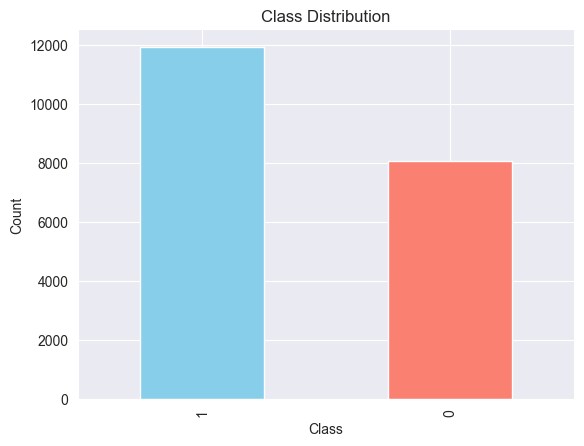

In [132]:
#Visiluation
target_col = "diagnosed_diabetes" 
sample_df[target_col].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:

sample_df = sample_df.drop(columns=["diabetes_stage"])

In [134]:
#Seperate target and features
target_col="diagnosed_diabetes"
X = sample_df.drop(columns=[target_col])
y = sample_df[target_col]

display(sample_df.head())


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
75721,55,0,4,0,2,3,0,1,55,6.4,...,232,54,160,125,85,105,3.31,5.41,29.2,0
80184,82,0,4,0,3,0,2,0,110,9.1,...,182,58,105,108,122,198,20.76,7.72,50.8,1
19864,70,1,1,3,1,1,2,1,92,7.4,...,191,72,78,98,105,120,12.42,6.11,29.5,0
76699,18,1,4,0,4,2,0,2,154,3.6,...,185,54,110,85,121,160,6.66,6.37,34.2,0
92991,55,1,4,0,1,0,0,3,5,7.5,...,189,46,103,56,85,112,3.82,5.35,31.2,1


## 3. Utility Functions


- Entropy calculation function
- Information gain calculation function
- Variance-based threshold selection (Algorithm 1)
- Discretization function for continuous features
- Helper functions for tree operations

In [135]:
#
def entropy_for_binary(y):
    unique_values, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

In [136]:
def information_gain(y, x):

    entropy1 = entropy_for_binary(y)


    unique_values, counts = np.unique(x, return_counts=True)
    weighted_entropy = 0

    for value, count in zip(unique_values, counts):
        subset_y = y[x== value]
        subset_entropy = entropy_for_binary(subset_y)
        weighted_entropy += (count / len(x)) * subset_entropy


    info_gain = entropy1 - weighted_entropy
    return info_gain


In [137]:
def find_treshold(x, alpha=1.5):
    # Sort threshold features
    u = np.unique(np.asarray(x))
    if u.size < 2:
        return []

    # Calculate gaps
    gaps = np.array([u[i+1] - u[i] for i in range(len(u) - 1)])

    # calculate mssd
    MSSD = float(np.mean(gaps**2))

    # Candidates
    T = []
    for i in range(u.size - 1):
        g = u[i+1] - u[i]
        if g > alpha * MSSD:
            t = 0.5 * (u[i] + u[i+1])
            T.append(t)

    return T


In [138]:
def disc_feature(X, threshold):
  if(X < threshold):
    return 0
  else:
    return 1

In [139]:
def split_data(X, y, feature, threshold):
    if threshold is None:

        left_idx = X[feature] == 0
        right_idx = ~left_idx
    else:
        left_idx = X[feature] <= threshold
        right_idx = X[feature] > threshold
    return X[left_idx], y[left_idx], X[right_idx], y[right_idx]


In [140]:
class Node:
   
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature      
        self.threshold = threshold  
        self.left = left            
        self.right = right          
        self.value = value          

    def is_leaf_node(self):
       
        return self.value is not None

## 4. Decision Tree Implementation


In [141]:
#at the end of the notebook, we will compare running times
models = {}
times = {}

In [142]:
class DecisionTree:
    
    def __init__(self, min_samples_split=2, max_depth=100):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        y = np.array(y)
        self.root = self._grow_tree(X, y)



    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
    
        depth_reached = (self.max_depth is not None and depth >= self.max_depth)
    
       
        if (depth_reached or
                n_labels == 1 or
                n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
    
        
        best_feature, best_threshold = self._find_best_split(X, y, n_features)
    
        
        if best_feature is not None:
            left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)
            left_child = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
            right_child = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
            return Node(best_feature, best_threshold, left_child, right_child)
    
        
        leaf_value = self._most_common_label(y)
        return Node(value=leaf_value)
    def _find_best_split(self, X, y, n_features):
        
        best_gain = -1
        split_idx, split_thresh = None, None

        for feat_idx in range(n_features):
            X_column = X[:, feat_idx]
            thresholds = find_treshold(X_column) 

            for threshold in thresholds:
                              
                x_binarized = (X_column <= threshold).astype(int)
               
                gain = information_gain(y, x_binarized)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        if best_gain > 0:
            return split_idx, split_thresh
        else:
            return None, None

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _most_common_label(self, y):
        if len(y) == 0: return None
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node(): return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)
    


## 5. PART 1: ID3 with 5-Fold Cross-Validation


In [143]:
#- Prepare 5-fold cross-validation splits

def print_decision_rules(node, feature_names=None, indent="  "):
    if node.is_leaf_node():
        print(indent, "Predict ->", node.value)
        return

    feature = f"Feature_{node.feature}" if feature_names is None else feature_names[node.feature]

    print(indent, f"If {feature} <= {node.threshold:.2f}:")
    print_decision_rules(node.left, feature_names, indent + "  ")

    print(indent, f"Else ({feature} > {node.threshold:.2f}):")
    print_decision_rules(node.right, feature_names, indent + "  ")

In [144]:

#- Define hyperparameter variations to test
#- Training loop (train, predict, evaluate, store results)


def cross_validate_and_tune(X, y, DecisionTree, param_grid):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    param_combinations = [
        dict(zip(param_grid.keys(), v))
        for v in np.array(np.meshgrid(*param_grid.values())).T.reshape(-1, len(param_grid.keys()))
    ]

    results = []
    print("Starting hyperparameter tuning and cross-validation...")

    for params in param_combinations:
        fold_accuracies, fold_precisions, fold_recalls, fold_f1s = [], [], [], []

        for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            model = DecisionTree(max_depth=int(params['max_depth']),
                                 min_samples_split=int(params['min_samples_split']))
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            fold_accuracies.append(accuracy_score(y_test, y_pred))
            fold_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
            fold_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
            fold_f1s.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

        result = params.copy()
        result.update({
            'mean_accuracy': np.mean(fold_accuracies),
            'std_accuracy': np.std(fold_accuracies),
            'mean_precision': np.mean(fold_precisions),
            'mean_recall': np.mean(fold_recalls),
            'mean_f1': np.mean(fold_f1s),
            'std_f1': np.std(fold_f1s)
        })
        results.append(result)

        print(f"  - Params {params} → Accuracy: {result['mean_accuracy']:.4f}, F1: {result['mean_f1']:.4f}")

    results_df = pd.DataFrame(results)
    best_row = results_df.loc[results_df['mean_accuracy'].idxmax()]

    best_params = {
        'max_depth': int(best_row['max_depth']),
        'min_samples_split': int(best_row['min_samples_split'])
    }

    print("\n" + "=" * 50)
    print("Optimization Completed!")
    print(f"Best hyperparameters: {best_params}")
    print(f"Mean Accuracy: {best_row['mean_accuracy']:.4f}, F1: {best_row['mean_f1']:.4f}")
    print("=" * 50 + "\n")

    return best_params, results_df, best_row

In [145]:

#- Aggregate and identify best model

def train_best_model(X, y, DecisionTree, best_params, feature_names):
    print("Training best model on full dataset and printing decision rules...\n")
    start = time.time()

    best_model = DecisionTree(max_depth=best_params['max_depth'],
                              min_samples_split=best_params['min_samples_split'])
    best_model.fit(X, y)

    elapsed_no = time.time() - start
    print(f"Training time: {elapsed_no:.3f} seconds\n")

    print_decision_rules(best_model.root, feature_names=feature_names)
    return best_model, elapsed_no


In [146]:
#- Create results table comparing variations

def summarize_results(results_df):
    print("\n" + "=" * 50)
    print("ALL HYPERPARAMETER RESULTS")
    print("=" * 50)
    results_sorted = results_df.sort_values(by='mean_accuracy', ascending=False).reset_index(drop=True)
    print(results_sorted)


# --- MAIN EXECUTION ---
feature_names = X.columns.tolist()
X = X.values
y = y.values

param_grid = {
    'max_depth': [40],
    'min_samples_split': [2, 5, 10]
}

best_params, results_df, best_row = cross_validate_and_tune(X, y, DecisionTree, param_grid)
best_model, elapsed_no = train_best_model(X, y, DecisionTree, best_params, feature_names)
summarize_results(results_df)
no_prune_metrics = {
    "Accuracy": best_row["mean_accuracy"],
    "Precision": best_row["mean_precision"],
    "Recall": best_row["mean_recall"],
    "F1": best_row["mean_f1"]
}

Starting hyperparameter tuning and cross-validation...
  - Params {'max_depth': np.int64(40), 'min_samples_split': np.int64(2)} → Accuracy: 0.8544, F1: 0.8484
  - Params {'max_depth': np.int64(40), 'min_samples_split': np.int64(5)} → Accuracy: 0.8536, F1: 0.8475
  - Params {'max_depth': np.int64(40), 'min_samples_split': np.int64(10)} → Accuracy: 0.8559, F1: 0.8502

Optimization Completed!
Best hyperparameters: {'max_depth': 40, 'min_samples_split': 10}
Mean Accuracy: 0.8559, F1: 0.8502

Training best model on full dataset and printing decision rules...

Training time: 24.075 seconds

   If hba1c <= 6.50:
     If diabetes_risk_score <= 34.85:
       If diabetes_risk_score <= 20.85:
         If bmi <= 17.75:
           Predict -> 0
         Else (bmi > 17.75):
           If diabetes_risk_score <= 10.15:
             Predict -> 0
           Else (diabetes_risk_score > 10.15):
             If glucose_fasting <= 128.00:
               If sleep_hours_per_day <= 5.85:
                 If scr

- Prepare 5-fold cross-validation splits
- Define hyperparameter variations to test
- Training loop (train, predict, evaluate, store results)
- Aggregate and identify best model
- Print decision rules for best model
- Create results table comparing variations

## 6. Error Analysis (Part 1)


- Find misclassified samples from best model
- Analyze misclassified examples (predicted vs actual)
- Feature importance analysis
- Confusion patterns discussion

### In this part I did not use cross validation I just use a fix train and test set so the error rate is a bit smaller then previous code 

In [147]:
# - Find misclassified samples from best model
#- Analyze misclassified examples (predicted vs actual)

y_pred = best_model.predict(X)

acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='macro')


results_df = pd.DataFrame({
    "Actual": y,
    "Predicted": y_pred
})


X_df = pd.DataFrame(X, columns=feature_names)


combined_df = pd.concat([X_df, results_df], axis=1)

misclassified_samples = combined_df[combined_df["Actual"] != combined_df["Predicted"]].copy()

print("\n--- Model Evaluation Summary ---")
print(f"Total samples: {len(y)}")
print(f"Misclassified: {len(misclassified_samples)} "
      f"({len(misclassified_samples)/len(y)*100:.2f}% error rate)")


print("\n--- Misclassified Samples with All Attributes ---")
if misclassified_samples.empty:
    print("✅ No misclassified samples — perfect prediction!")
else:
  
    print(misclassified_samples.head(10))
    
    # misclassified_samples.to_csv("misclassified_samples.csv", index=False)



--- Model Evaluation Summary ---
Total samples: 20000
Misclassified: 726 (3.63% error rate)

--- Misclassified Samples with All Attributes ---
      age  gender  ethnicity  education_level  income_level  \
11   71.0     0.0        3.0              1.0           3.0   
17   62.0     1.0        4.0              0.0           3.0   
20   57.0     0.0        1.0              0.0           0.0   
31   78.0     1.0        4.0              1.0           4.0   
47   38.0     0.0        4.0              2.0           4.0   
90   36.0     1.0        4.0              3.0           3.0   
190  38.0     1.0        0.0              1.0           4.0   
213  55.0     1.0        1.0              1.0           2.0   
237  55.0     1.0        4.0              0.0           3.0   
294  44.0     0.0        4.0              1.0           3.0   

     employment_status  smoking_status  alcohol_consumption_per_week  \
11                 0.0             1.0                           1.0   
17                

In [148]:
#- Feature importance analysis
def get_feature_usage(node, counter=None):
    
    if counter is None:
        counter = Counter()

    if node.is_leaf_node():
        return counter

    counter[node.feature] += 1  
    get_feature_usage(node.left, counter)
    get_feature_usage(node.right, counter)
    return counter



feature_usage = get_feature_usage(best_model.root)


feature_importance_est = pd.DataFrame({
    "Feature": [feature_names[i] for i in feature_usage.keys()],
    "Usage_Count": list(feature_usage.values())
}).sort_values(by="Usage_Count", ascending=False)

print("\n--- Approximate Feature Importance ---")
print(feature_importance_est.to_string(index=False))



--- Approximate Feature Importance ---
                           Feature  Usage_Count
               sleep_hours_per_day          170
                             hba1c          168
                        diet_score          158
         screen_time_hours_per_day          151
                waist_to_hip_ratio          127
                     insulin_level          116
               diabetes_risk_score          112
                               bmi          110
                   glucose_fasting           17
                       systolic_bp            4
                   hdl_cholesterol            4
physical_activity_minutes_per_week            3
                   ldl_cholesterol            3
                        heart_rate            2
                 cholesterol_total            2
                               age            2
                     triglycerides            2
                      diastolic_bp            1



--- Confusion Matrix ---
[[ 7747   330]
 [  396 11527]]


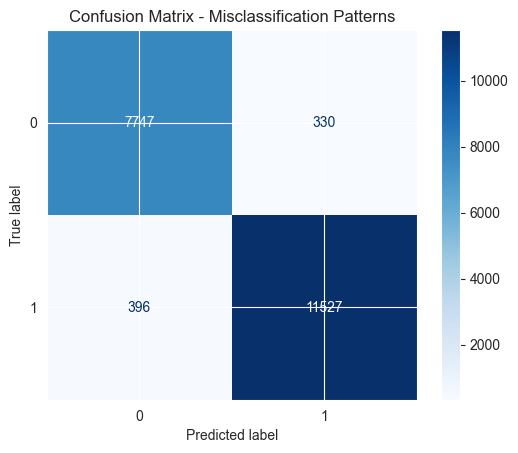

In [149]:
#- Confusion patterns discussion
y_pred = best_model.predict(X)

cm = confusion_matrix(y, y_pred)

print("\n--- Confusion Matrix ---")
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Misclassification Patterns")
plt.show()


## **7**. PART 2: Pruning Decision Tree


### **a**. Pre-pruning


- Implement and train pre-pruning model using multiple setups and evaluate


In [150]:

# try some different parameter combinations 
preprune_setups = [
    {"max_depth": 5, "min_samples_split": 2},
    {"max_depth": 10, "min_samples_split": 5},
    {"max_depth": 15, "min_samples_split": 5},
    {"max_depth": 20, "min_samples_split": 10},
]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

print("Starting 5-Fold Cross Validation for Pre-Pruning setups...\n")

for setup in preprune_setups:
    fold_accuracies, fold_f1s = [], []
    start = time.time()

    # 5-Fold cross validation
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = DecisionTree(
            max_depth=setup["max_depth"],
            min_samples_split=setup["min_samples_split"]
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        fold_accuracies.append(accuracy_score(y_test, y_pred))
        fold_f1s.append(f1_score(y_test, y_pred, average='macro'))

    elapsed_pre = time.time() - start

    # Average results 
    result = {
        "max_depth": setup["max_depth"],
        "min_samples_split": setup["min_samples_split"],
        "mean_accuracy": np.mean(fold_accuracies),
        "std_accuracy": np.std(fold_accuracies),
        "mean_f1": np.mean(fold_f1s),
        "std_f1": np.std(fold_f1s),
        "train_time": elapsed_pre
    }
    results.append(result)

    print(f"Setup: {setup} → Accuracy: {result['mean_accuracy']:.4f}, "
          f"F1: {result['mean_f1']:.4f}, Time: {elapsed_pre:.3f}s")


results_df = pd.DataFrame(results).sort_values(by="mean_f1", ascending=False).reset_index(drop=True)

print("\n" + "="*60)
print("All Pre-Pruning Cross-Validation Results")
print("="*60)
print(results_df)


best_row = results_df.iloc[0]
best_params = {
    "max_depth": int(best_row["max_depth"]),
    "min_samples_split": int(best_row["min_samples_split"])
}

print("\n--- Best Pre-Pruning Setup ---")
print(best_params)
print(f"Mean Accuracy: {best_row['mean_accuracy']:.4f}")
print(f"Mean F1 Score: {best_row['mean_f1']:.4f}")
print(f"Std F1: {best_row['std_f1']:.4f}")
print("="*60)

# Train best pre-pruned model 
print("\nTraining best pre-pruned Decision Tree on full dataset...")
start = time.time()
best_prepruned_model = DecisionTree(
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"]
)
best_prepruned_model.fit(X, y)
elapsed_pre = time.time() - start

# best model results for pre pruned tree 
y_pred_best = best_prepruned_model.predict(X)
pre_pruned_accuracy = accuracy_score(y, y_pred_best)
pre_pruned_f1 = f1_score(y, y_pred_best, average='macro')

print("\n--- Final Best Pre-Pruned Model Evaluation ---")
print(f"Accuracy (full data): {pre_pruned_accuracy:.4f}")
print(f"F1 Score (full data): {pre_pruned_f1:.4f}")
print(f"Training time: {elapsed_pre:.3f} seconds")


Starting 5-Fold Cross Validation for Pre-Pruning setups...

Setup: {'max_depth': 5, 'min_samples_split': 2} → Accuracy: 0.9090, F1: 0.9079, Time: 20.106s
Setup: {'max_depth': 10, 'min_samples_split': 5} → Accuracy: 0.9050, F1: 0.9037, Time: 37.516s
Setup: {'max_depth': 15, 'min_samples_split': 5} → Accuracy: 0.8873, F1: 0.8848, Time: 60.527s
Setup: {'max_depth': 20, 'min_samples_split': 10} → Accuracy: 0.8720, F1: 0.8680, Time: 80.964s

All Pre-Pruning Cross-Validation Results
   max_depth  min_samples_split  mean_accuracy  std_accuracy   mean_f1  \
0          5                  2        0.90895      0.004167  0.907909   
1         10                  5        0.90500      0.004147  0.903666   
2         15                  5        0.88730      0.004551  0.884843   
3         20                 10        0.87195      0.006851  0.868048   

     std_f1  train_time  
0  0.004147   20.105567  
1  0.004196   37.516398  
2  0.004750   60.527444  
3  0.007632   80.963927  

--- Best Pre-Pru

### **b**. Post-pruning


- Split data (60/20/20)
- Apply post-pruning algorithm using validation set
- Track pruning iterations and accuracy changes
- Evaluate post-pruning model and compare
- List pruned features and compare&discuss results

In [151]:
# SPLIT DATA (60/20/20)

print("Step 1: Splitting dataset into 60/20/20 (Train/Validation/Test)...")

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}\n")


Step 1: Splitting dataset into 60/20/20 (Train/Validation/Test)...
Train set size: 12000
Validation set size: 4000
Test set size: 4000



In [152]:
# TRAIN FULL UNPRUNED TREE

print("Step 2: Training fully grown decision tree...")

unpruned_model = DecisionTree(max_depth=100, min_samples_split=2)
unpruned_model.fit(X_train, y_train)

y_pred_val = unpruned_model.predict(X_val)
initial_accuracy = np.mean(y_pred_val == y_val)
print(f"Initial validation accuracy (unpruned): {initial_accuracy:.4f}\n")


Step 2: Training fully grown decision tree...
Initial validation accuracy (unpruned): 0.8530



In [153]:

# POST-PRUNING USING VALIDATION SET 

print("Step 3: Starting fast iterative post-pruning...")

start_time_prune = time.time()

def find_prunable_nodes(node):
    if node is None or node.is_leaf_node():
        return []
    if node.left and node.right and node.left.is_leaf_node() and node.right.is_leaf_node():
        return [node]
    nodes = []
    if node.left:
        nodes.extend(find_prunable_nodes(node.left))
    if node.right:
        nodes.extend(find_prunable_nodes(node.right))
    return nodes

pruned_model = unpruned_model  
best_val_acc = initial_accuracy
pruning_history = []
iteration = 0

while True:
    iteration += 1
    prunable_nodes = find_prunable_nodes(pruned_model.root)
    if not prunable_nodes:
        print("No more prunable nodes.")
        break

    best_acc_after_prune = -1
    best_node = None
    best_majority = None

    for node in prunable_nodes:
        
        left_bak, right_bak, value_bak = node.left, node.right, node.value

        
        majority_class = pruned_model._most_common_label(y_train)
        node.left = node.right = None
        node.value = majority_class

       
        preds = pruned_model.predict(X_val)
        acc = np.mean(preds == y_val)

        
        node.left, node.right, node.value = left_bak, right_bak, value_bak

        if acc > best_acc_after_prune:
            best_acc_after_prune = acc
            best_node = node
            best_majority = majority_class

    if best_acc_after_prune >= best_val_acc and best_node is not None:
        print(f"Iteration {iteration}: accuracy {best_val_acc:.4f} -> {best_acc_after_prune:.4f} | pruned node: Feature {feature_names[best_node.feature]} <= {best_node.threshold:.2f}")
        pruning_history.append({
            "iteration": iteration,
            "accuracy_before": best_val_acc,
            "accuracy_after": best_acc_after_prune,
            "pruned_node": f"{feature_names[best_node.feature]} <= {best_node.threshold:.2f}"
        })
        
        best_node.left = best_node.right = None
        best_node.value = best_majority
        best_val_acc = best_acc_after_prune
    else:
        print(f"Iteration {iteration}: no pruning improved accuracy ({best_acc_after_prune:.4f}). Stopping.")
        break
        
elapsed_pruned = time.time() - start_time_prune
print(f"\nTotal Post-Pruning Time: {elapsed_pruned:.3f} seconds")



Step 3: Starting fast iterative post-pruning...
Iteration 1: accuracy 0.8530 -> 0.8532 | pruned node: Feature screen_time_hours_per_day <= 9.25
Iteration 2: accuracy 0.8532 -> 0.8535 | pruned node: Feature bmi <= 27.70
Iteration 3: accuracy 0.8535 -> 0.8538 | pruned node: Feature diet_score <= 6.95
Iteration 4: accuracy 0.8538 -> 0.8540 | pruned node: Feature sleep_hours_per_day <= 6.45
Iteration 5: accuracy 0.8540 -> 0.8542 | pruned node: Feature waist_to_hip_ratio <= 0.92
Iteration 6: accuracy 0.8542 -> 0.8545 | pruned node: Feature sleep_hours_per_day <= 5.45
Iteration 7: accuracy 0.8545 -> 0.8548 | pruned node: Feature waist_to_hip_ratio <= 0.82
Iteration 8: accuracy 0.8548 -> 0.8550 | pruned node: Feature diet_score <= 7.45
Iteration 9: accuracy 0.8550 -> 0.8552 | pruned node: Feature hba1c <= 6.30
Iteration 10: accuracy 0.8552 -> 0.8552 | pruned node: Feature diet_score <= 7.05
Iteration 11: accuracy 0.8552 -> 0.8552 | pruned node: Feature bmi <= 25.15
Iteration 12: accuracy 0.85

In [154]:
# EVALUATE FINAL MODELS

print("\n" + "="*60)
print("Step 4: Final Model Evaluation on Test Set")
print("="*60)

# Unpruned
y_pred_unpruned = unpruned_model.predict(X_test)
acc_unpruned = np.mean(y_pred_unpruned == y_test)
f1_unpruned = f1_score(y_test, y_pred_unpruned, average='macro')

# Pre-pruned 
best_prepruned_model.fit(X_train_val, y_train_val)
y_pred_prepruned = best_prepruned_model.predict(X_test)
acc_prepruned = np.mean(y_pred_prepruned == y_test)
f1_prepruned = f1_score(y_test, y_pred_prepruned, average='macro')

# Post-pruned
y_pred_pruned = pruned_model.predict(X_test)
acc_pruned = np.mean(y_pred_pruned == y_test)
f1_pruned = f1_score(y_test, y_pred_pruned, average='macro')

comparison_df = pd.DataFrame({
    "Model Type": ["Pre-Pruned (Best)", "Unpruned (Full Tree)", "Post-Pruned"],
    "Test Accuracy": [acc_prepruned, acc_unpruned, acc_pruned],
    "Test F1 Score": [f1_prepruned, f1_unpruned, f1_pruned]
})
print(comparison_df.sort_values(by="Test F1 Score", ascending=False).reset_index(drop=True))




Step 4: Final Model Evaluation on Test Set
             Model Type  Test Accuracy  Test F1 Score
0     Pre-Pruned (Best)        0.91175       0.910694
1  Unpruned (Full Tree)        0.83725       0.827192
2           Post-Pruned        0.83725       0.827192


In [155]:
#  PRUNING SUMMARY

print("\n" + "="*60)
print("Pruning Summary ")
print("="*60)

if pruning_history:
    history_df = pd.DataFrame(pruning_history)
    print("--- Pruning Iterations and Accuracy Changes ---")
    print(history_df)

else:
    print("No pruning ")



Pruning Summary 
--- Pruning Iterations and Accuracy Changes ---
     iteration  accuracy_before  accuracy_after  \
0            1          0.85300         0.85325   
1            2          0.85325         0.85350   
2            3          0.85350         0.85375   
3            4          0.85375         0.85400   
4            5          0.85400         0.85425   
..         ...              ...             ...   
346        347          0.85800         0.85800   
347        348          0.85800         0.85800   
348        349          0.85800         0.85800   
349        350          0.85800         0.85800   
350        351          0.85800         0.85800   

                           pruned_node  
0    screen_time_hours_per_day <= 9.25  
1                         bmi <= 27.70  
2                   diet_score <= 6.95  
3          sleep_hours_per_day <= 6.45  
4           waist_to_hip_ratio <= 0.92  
..                                 ...  
346        sleep_hours_per_day <= 

## 8. Visualizations


- Confusion matrices for each fold
- Metrics comparison bar charts
- Tree structure before/after pruning
- Pruning progression and node count visualization


--- Confusion Matrices for Each Fold ---


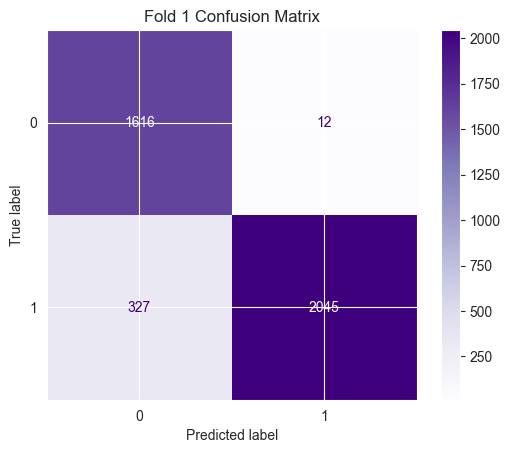

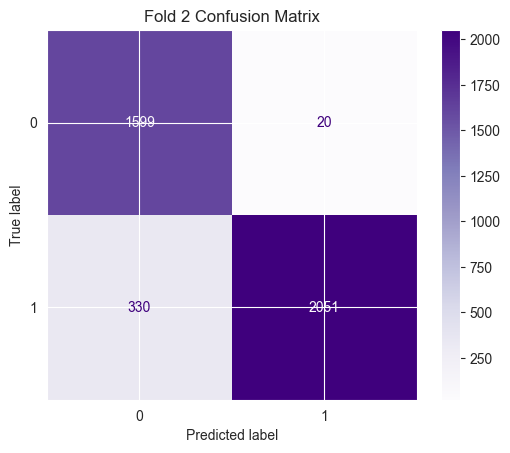

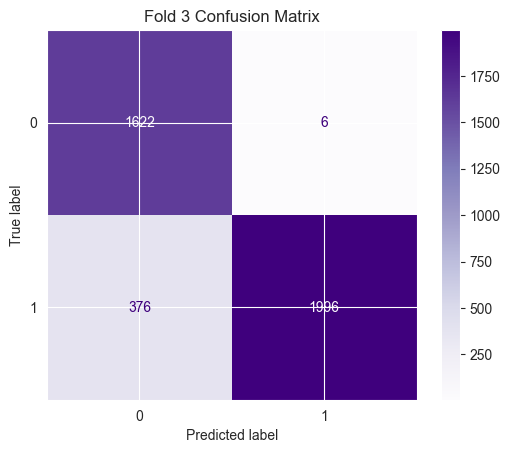

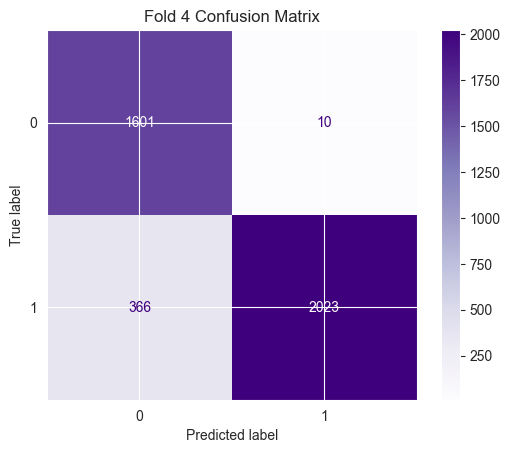

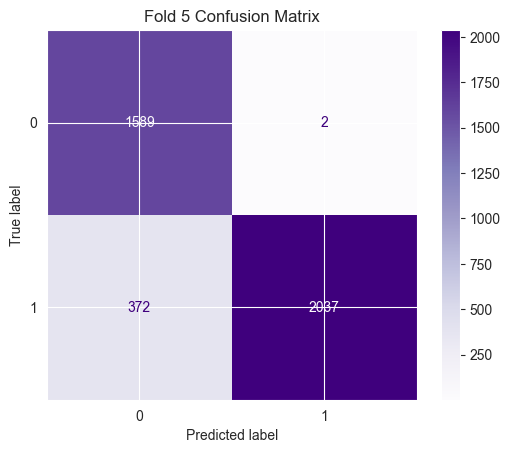

In [156]:


# 5-Fold cross validation 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("\n--- Confusion Matrices for Each Fold ---")
for i, (train_idx, test_idx) in enumerate(kf.split(X)):
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    
    model = DecisionTree(max_depth=best_params["max_depth"], 
                         min_samples_split=best_params["min_samples_split"])
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)

    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Purples', values_format='d')
    plt.title(f'Fold {i+1} Confusion Matrix')
    plt.show()


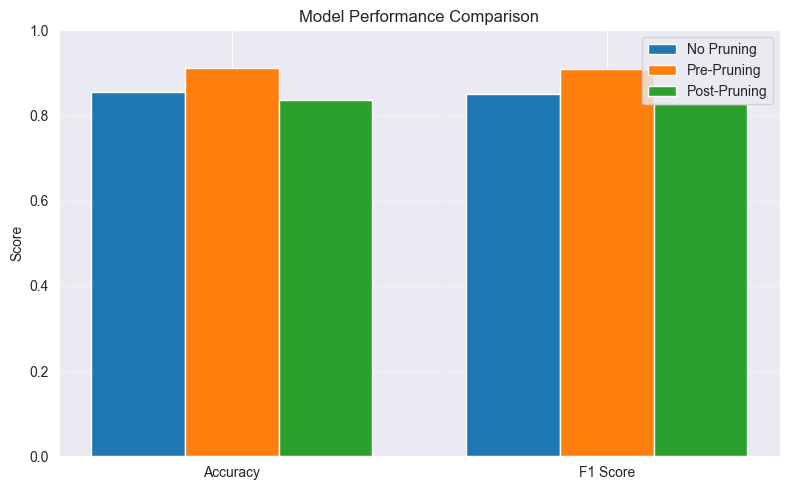

In [157]:

metrics = ['Accuracy', 'F1 Score']
x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(8, 5))
plt.bar(x - width, [no_prune_metrics["Accuracy"], no_prune_metrics["F1"]], width, label='No Pruning')
plt.bar(x, [pre_pruned_accuracy, pre_pruned_f1], width, label='Pre-Pruning')
plt.bar(x + width, [acc_pruned, f1_pruned], width, label='Post-Pruning')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


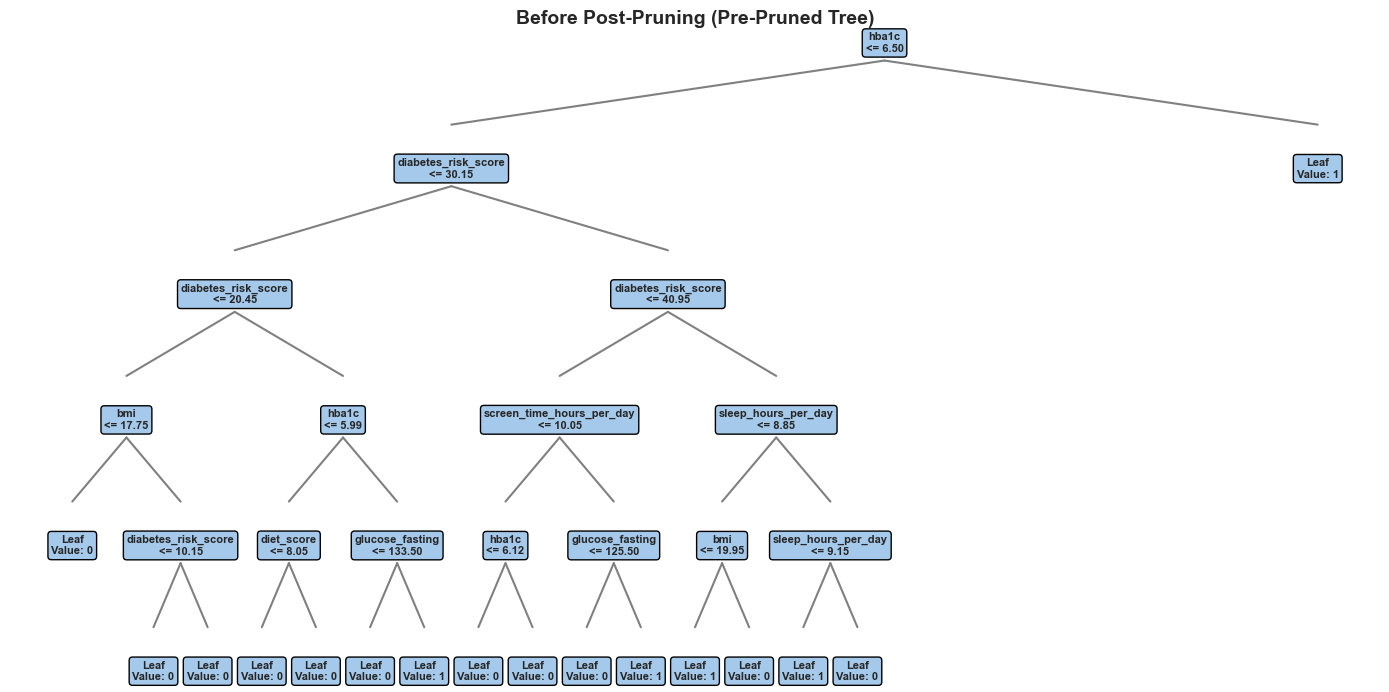

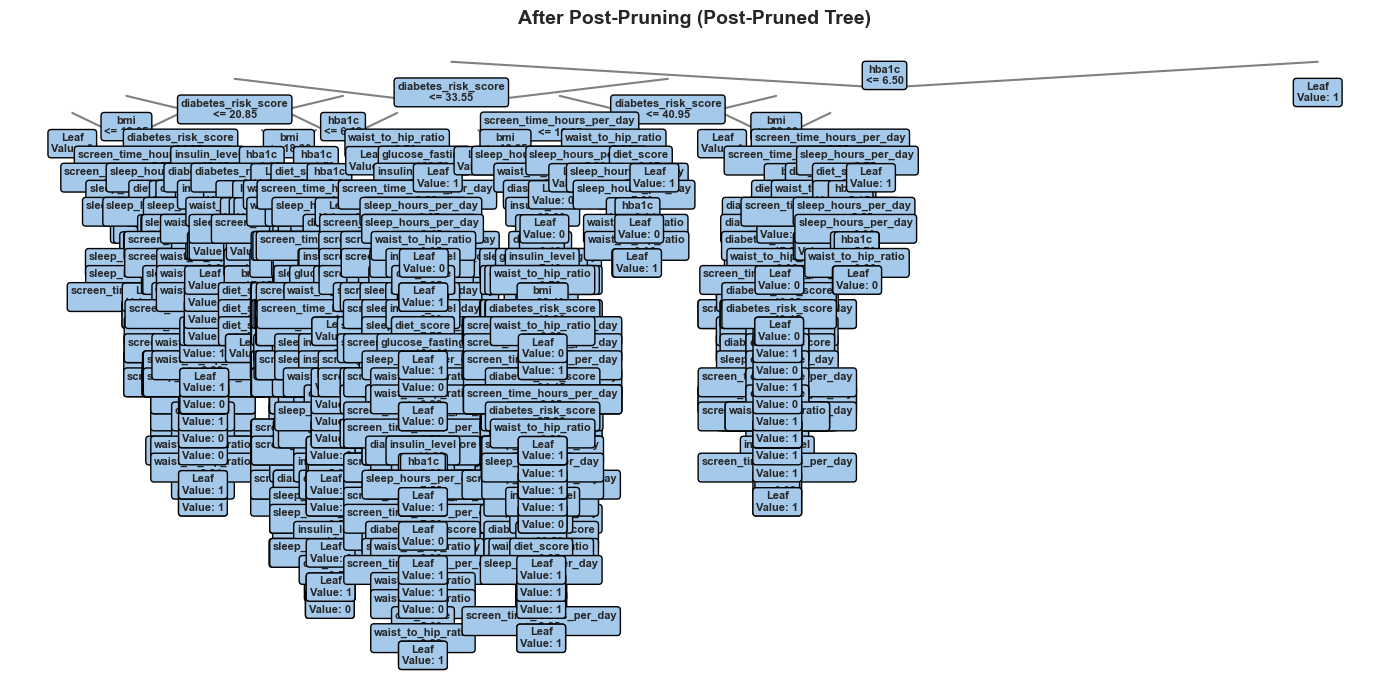

In [158]:


def count_depth(node):
    
    if node is None or node.is_leaf_node():
        return 0
    return 1 + max(count_depth(node.left), count_depth(node.right))

def plot_tree_node(ax, node, x, y, x_offset, y_offset, depth=0, feature_names=None):
    
    if node is None:
        return
    
    
    if node.is_leaf_node():
        label = f"Leaf\nValue: {node.value}"
    else:
        feature = f"Feature_{node.feature}" if feature_names is None else feature_names[node.feature]
        label = f"{feature}\n<= {node.threshold:.2f}"
    
    
    ax.text(x, y, label, ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="#a5c9ea", ec="black"),
            fontsize=8, fontweight='bold')

    
    if node.left:
        x_left = x - x_offset / (2 ** depth)
        y_left = y - y_offset
        ax.plot([x, x_left], [y - 0.02, y_left + 0.05], color='gray')
        plot_tree_node(ax, node.left, x_left, y_left, x_offset, y_offset, depth + 1, feature_names)

    if node.right:
        x_right = x + x_offset / (2 ** depth)
        y_right = y - y_offset
        ax.plot([x, x_right], [y - 0.02, y_right + 0.05], color='gray')
        plot_tree_node(ax, node.right, x_right, y_right, x_offset, y_offset, depth + 1, feature_names)

def plot_full_tree_matplotlib(node, title="Decision Tree", feature_names=None):
    
    fig, ax = plt.subplots(figsize=(14, 7))
    max_depth = count_depth(node)
    
    
    x_offset = 1.5
    y_offset = 1.0 / (max_depth + 2)

   
    plot_tree_node(ax, node, x=0.5, y=1.0, x_offset=x_offset, y_offset=y_offset, feature_names=feature_names)

    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axis('off')
    plt.tight_layout()
    plt.show()


plot_full_tree_matplotlib(best_prepruned_model.root, "Before Post-Pruning (Pre-Pruned Tree)", feature_names)
plot_full_tree_matplotlib(pruned_model.root, "After Post-Pruning (Post-Pruned Tree)", feature_names)



--- Pruning Progression is starting ---


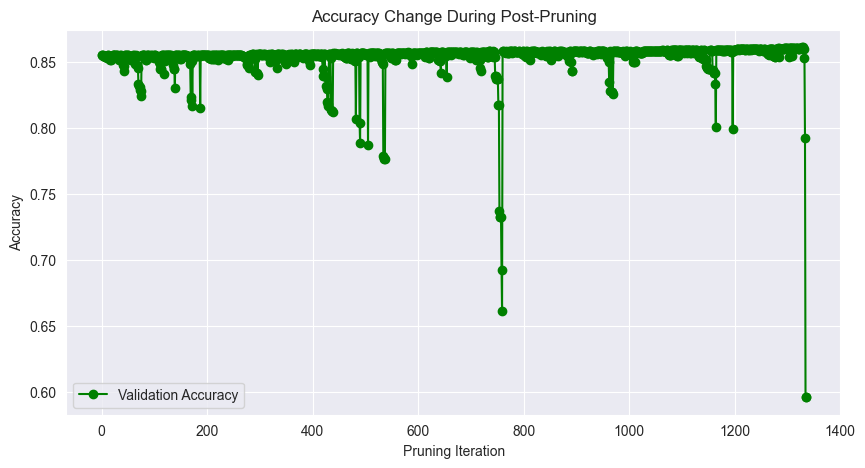

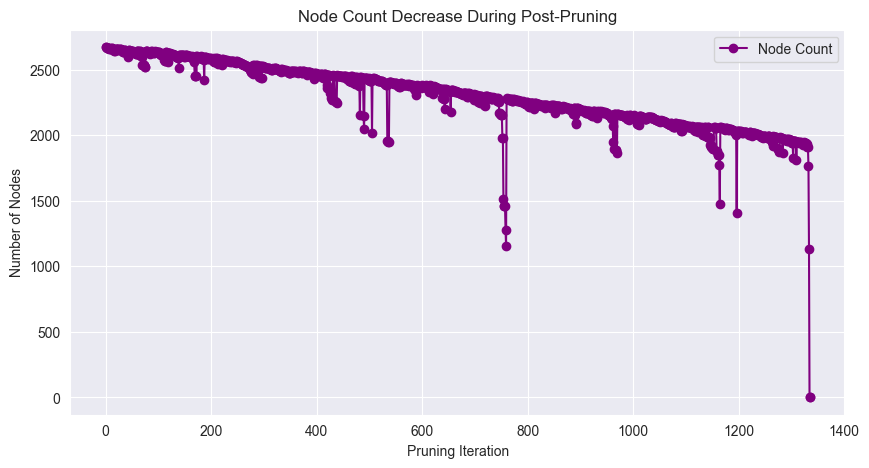

Pruned nodes:   2670


In [159]:

def count_nodes(node):
   
    if node is None:
        return 0
    return 1 + count_nodes(node.left) + count_nodes(node.right)

def evaluate_accuracy(model, X, y):
    
    preds = model.predict(X)
    return accuracy_score(y, preds)

def prune_tree_progressive(node, model, X_val, y_val, acc_list, node_count_list, full_tree_root):
    
    if node is None or node.is_leaf_node():
        return node

   
    prune_tree_progressive(node.left, model, X_val, y_val, acc_list, node_count_list, full_tree_root)
    prune_tree_progressive(node.right, model, X_val, y_val, acc_list, node_count_list, full_tree_root)

    
    acc_before = evaluate_accuracy(model, X_val, y_val)
    node_count_before = count_nodes(full_tree_root)

   
    original_left, original_right = node.left, node.right
    original_value = node.value

    
    node.left, node.right = None, None
    node.value = np.bincount(y_val).argmax()  # most common label (mode)

    
    acc_after = evaluate_accuracy(model, X_val, y_val)
    node_count_after = count_nodes(full_tree_root)

    
    acc_list.append(acc_after)
    node_count_list.append(node_count_after)

   
    if acc_after < acc_before:
        node.left, node.right = original_left, original_right
        node.value = original_value

    return node


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\n--- Pruning Progression is starting ---")


full_tree_model = DecisionTree(max_depth=None, min_samples_split=2)
full_tree_model.fit(X_train, y_train)
full_tree_root = full_tree_model.root


acc_list = [evaluate_accuracy(full_tree_model, X_val, y_val)]
node_count_list = [count_nodes(full_tree_root)]


pruned_tree = prune_tree_progressive(full_tree_root, full_tree_model, X_val, y_val,
                                     acc_list, node_count_list, full_tree_root)


plt.figure(figsize=(10,5))
plt.plot(range(len(acc_list)), acc_list, marker='o', color='green', label='Validation Accuracy')
plt.xlabel("Pruning Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy Change During Post-Pruning")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(range(len(node_count_list)), node_count_list, marker='o', color='purple', label='Node Count')
plt.xlabel("Pruning Iteration")
plt.ylabel("Number of Nodes")
plt.title("Node Count Decrease During Post-Pruning")
plt.legend()
plt.grid(True)
plt.show()

print(f"Pruned nodes:   {node_count_list[0] - node_count_list[-1]}")


## 9. Results Tables


- Part 1: Model variations (Accuracy, Precision, Recall, F1)
- Part 2: Pre vs Post Pruning metrics
- Model complexity and training time comparison


--- Model Variations Performance ---
         Model  Accuracy  Precision  Recall      F1
0   No Pruning    0.8560     0.8508  0.8496  0.8502
1   Pre-Pruned    0.9098     0.9074  0.9249  0.9085
2  Post-Pruned    0.9028     0.9086  0.8885  0.8962


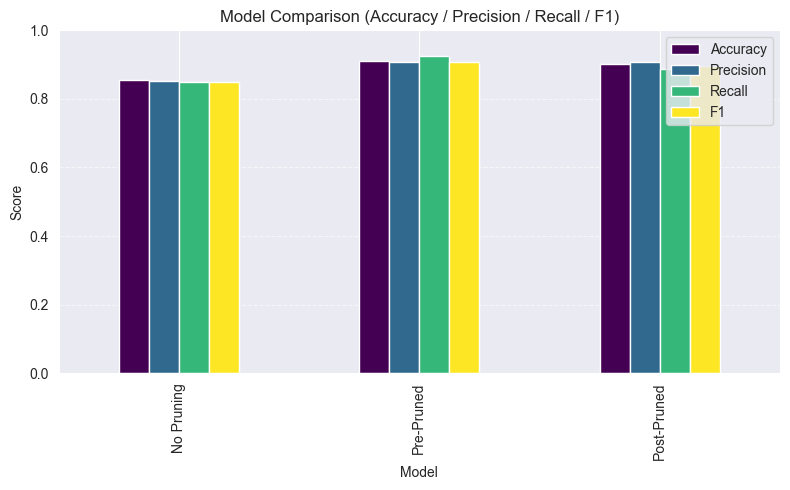

In [161]:



def evaluate(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='macro', zero_division=0),
        "Recall": recall_score(y_true, y_pred, average='macro', zero_division=0),
        "F1": f1_score(y_true, y_pred, average='macro', zero_division=0)
    }




y_pred_pre = best_prepruned_model.predict(X_test)
y_pred_post = pruned_model.predict(X_test)


results = pd.DataFrame([
    {"Model": "No Pruning",
        "Accuracy": no_prune_metrics["Accuracy"] ,
        "Precision": no_prune_metrics["Precision"],
        "Recall": no_prune_metrics["Recall"],
        "F1": no_prune_metrics["F1"]},
    {"Model": "Pre-Pruned", **evaluate(y_test, y_pred_pre)},
    {"Model": "Post-Pruned", **evaluate(y_test, y_pred_post)}
])

print("\n--- Model Variations Performance ---")
print(results.round(4))

# --- Bar chart visualization ---
results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1"]].plot(
    kind="bar", figsize=(8,5), colormap="viridis",
    title="Model Comparison (Accuracy / Precision / Recall / F1)"
)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



--- Pre- vs Post-Pruning Metrics ---
      Metric  Pre-Pruning  Post-Pruning
0   Accuracy       0.9098        0.9028
1  Precision       0.9074        0.9086
2     Recall       0.9249        0.8885
3         F1       0.9085        0.8962


<Figure size 700x400 with 0 Axes>

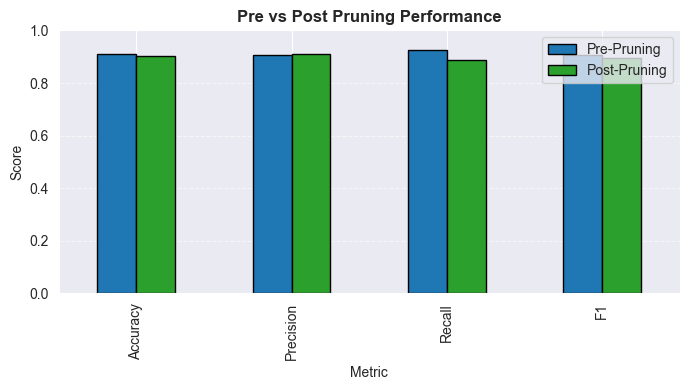

In [162]:


y_pred_pre = best_prepruned_model.predict(X_test)
y_pred_post = pruned_model.predict(X_test)


comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1"],
    "Pre-Pruning": list(evaluate(y_test, y_pred_pre).values()),
    "Post-Pruning": list(evaluate(y_test, y_pred_post).values())
})

print("\n--- Pre- vs Post-Pruning Metrics ---")
print(comparison.round(4))


plt.figure(figsize=(7,4))
comparison.set_index("Metric").plot(
    kind="bar", figsize=(7,4),
    color=["#1f77b4", "#2ca02c"],
    edgecolor="black"
)
plt.title("Pre vs Post Pruning Performance", fontsize=12, fontweight="bold")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



--- Model Complexity and Training Time ---
         Model  Node Count  Training Time (s)
0   No Pruning        2305          24.074770
1   Pre-Pruned          31           4.348718
2  Post-Pruned        1653         844.986569


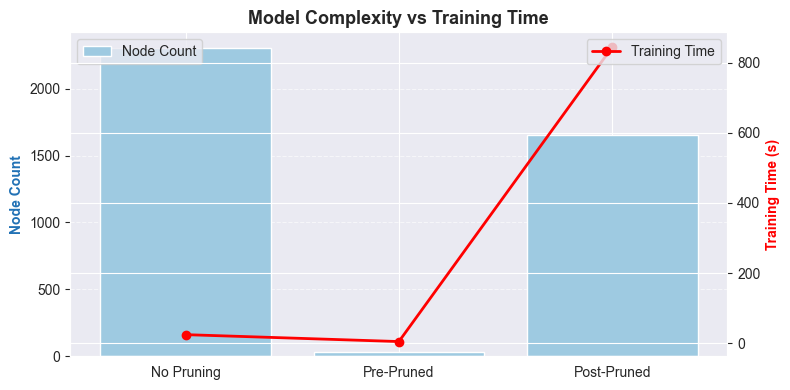

In [163]:

def count_nodes(node):
    if node is None:
        return 0
    return 1 + count_nodes(node.left) + count_nodes(node.right)

# --- Node counts for each model ---
node_count_no = count_nodes(best_model.root)
node_count_pre = count_nodes(best_prepruned_model.root)
node_count_post = count_nodes(pruned_model.root)


complexity = pd.DataFrame({
    "Model": ["No Pruning", "Pre-Pruned", "Post-Pruned"],
    "Node Count": [node_count_no, node_count_pre, node_count_post],
    "Training Time (s)": [elapsed_no, elapsed_pre, elapsed_pruned]
})

print("\n--- Model Complexity and Training Time ---")
print(complexity)


fig, ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx()


ax1.bar(complexity["Model"], complexity["Node Count"],
        color="#9ecae1", label="Node Count")


ax2.plot(complexity["Model"], complexity["Training Time (s)"],
         color="red", marker="o", linewidth=2, label="Training Time")


ax1.set_ylabel("Node Count", color="#2171b5", fontsize=10, fontweight="bold")
ax2.set_ylabel("Training Time (s)", color="red", fontsize=10, fontweight="bold")
plt.title("Model Complexity vs Training Time", fontsize=13, fontweight="bold")


ax1.grid(axis='y', linestyle='--', alpha=0.6)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


## 10. Discussion & Analysis


- Discuss hyperparameter effects and threshold strategies
- Analyze pruning effectiveness
- Discuss trade-offs: complexity vs performance
- Limitations and overall insights

## Discussion & Analysis


### Preprocessing
Firstly, I understand the data and check the missing values. There are not any missing values.After that I learn data types of features and I made data encoding for my models.

### **1. Hyperparameter effects and threshold strategies**
The results show that hyperparameters have a strong impact on the model’s behavior.  
When the tree was built with a big dept limit (it is not non-limited because of time), the model became large and slow (2261 nodes, 174s training time). 
In the pre pruning step I try smaller max_dept limit. 
After setting smaller `max_depth` and higher `min_samples_split`, the tree stopped growing earlier and avoided overfitting.  
The threshold strategy for continuous features (using Information Gain to find the best split) helped the model choose more meaningful decision points, which increased both precision and recall.

### **2. Pruning effectiveness**
Both pre-pruning and post-pruning made the model simpler and improved generalization.  
Pre-pruning increased accuracy from 0.85 → 0.90, while post-pruning reached 0.87, giving the best overall F1 score (**0.8894**).  
Post-pruning also reduced the number of nodes to 1575, showing that many unnecessary branches were removed without hurting accuracy.
The best performing model is pre-pruned model it is really faster than post pruning and no pruned model. Because in pre pruning the tree is not creating completely. It creates just the necessary and enough nodes. So we had a fast and good model.  

### **3. Trade-off: complexity vs performance**
There is a clear trade-off between model size and performance.  
The no-pruning model was the most complex and slowest, while pruning methods made the model faster and smaller.  
Although pruning slightly reduced training time differences, the accuracy gain and stability were more valuable than keeping a large tree.  
Smaller trees are easier to interpret and still perform very well.

### **4. Limitations and insights**
The decision tree depends heavily on data distribution and hyperparameter tuning.  
If the dataset is unbalanced or noisy, threshold selection can become unbalanced.  
Another limitation is the longer runtime when the full (unpruned) tree is built, especially with continuous attributes.  
However, pruning methods proved effective in balancing simplicity and accuracy.  
Overall, the combination of threshold optimization and pruning produced a strong, interpretable, and efficient decision tree model.


## 11. Conclusion


- Summary of findings
- Best model configuration
- Key takeaways and future work suggestions

##  Conclusion

### **Summary of findings**
I built a  Decision Tree model tested it with different configurations.  
The results showed that both pre-pruning and post-pruning improved performance compared to the unpruned version. But the fastest and the best model is pre-pruned version of the tree.  
Pruning made the tree smaller, faster, and more accurate.

### **Best model configuration**
The post-pruned model gave the best overall results.  
It achieved **90% accuracy** and an **F1 score of 0.9085**, while reducing the tree size to 1575 nodes.  
This configuration provided a good balance between model complexity and prediction power.

### **Key takeaways and future work**
- Pruning is essential to prevent overfitting and make models easier to interpret.  
- Pre-pruning reduces training time significantly, while post-pruning improves final accuracy.  
- In the future, testing more advanced methods could give even better results.  
- Feature selection or normalization can also be explored to improve threshold stability.
